In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df=data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<Axes: xlabel='type', ylabel='count'>

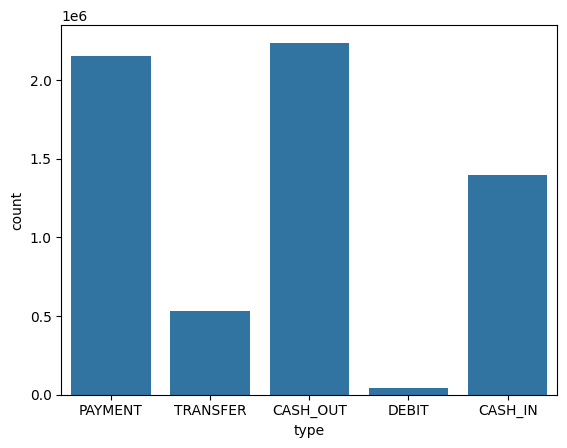

In [7]:
sns.countplot(x='type',data=df)

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

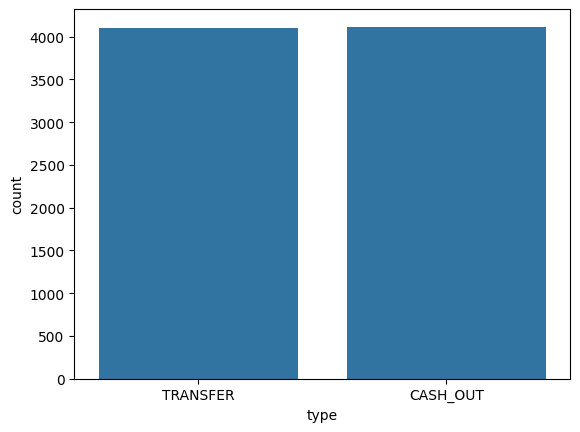

In [10]:
sns.countplot(df[df['isFraud']==1],x='type')

Text(0.5, 0, 'amount')

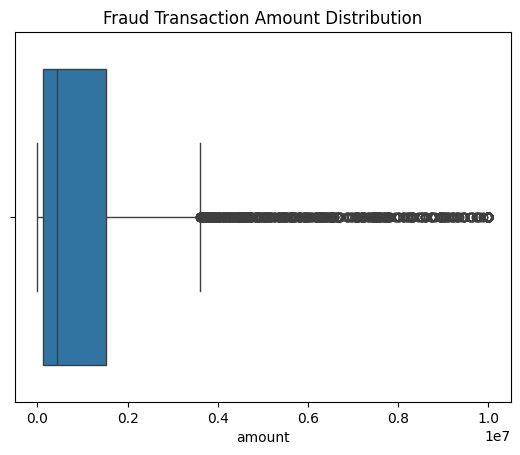

In [11]:
sns.boxplot(df[df['isFraud']==1]["amount"].values, orient='h')
plt.title('Fraud Transaction Amount Distribution')
plt.xlabel('amount')

In [12]:
df[df['step']>24]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
574255,25,PAYMENT,19161.18,C1954261867,1589.00,0.00,M1085509720,0.00,0.00,0,0
574256,25,PAYMENT,7725.76,C912521968,189169.00,181443.24,M1216280274,0.00,0.00,0,0
574257,25,PAYMENT,7655.50,C1635204165,127302.00,119646.50,M1025130851,0.00,0.00,0,0
574258,25,PAYMENT,15856.99,C336042058,119646.50,103789.51,M737162366,0.00,0.00,0,0
574259,25,PAYMENT,1300.98,C1933422673,20559.00,19258.02,M474215948,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


<Axes: xlabel='hour', ylabel='count'>

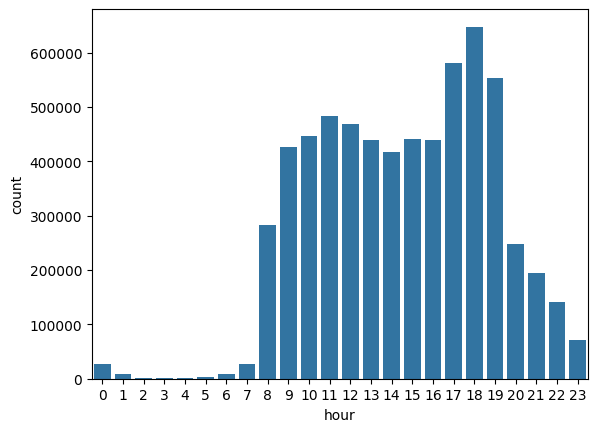

In [13]:
df['hour'] = (df['step'] - 1) % 24
sns.countplot(df, x='hour')

In [14]:
df.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [15]:
df_encoded=pd.get_dummies(df,columns=['type'],drop_first=True)
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


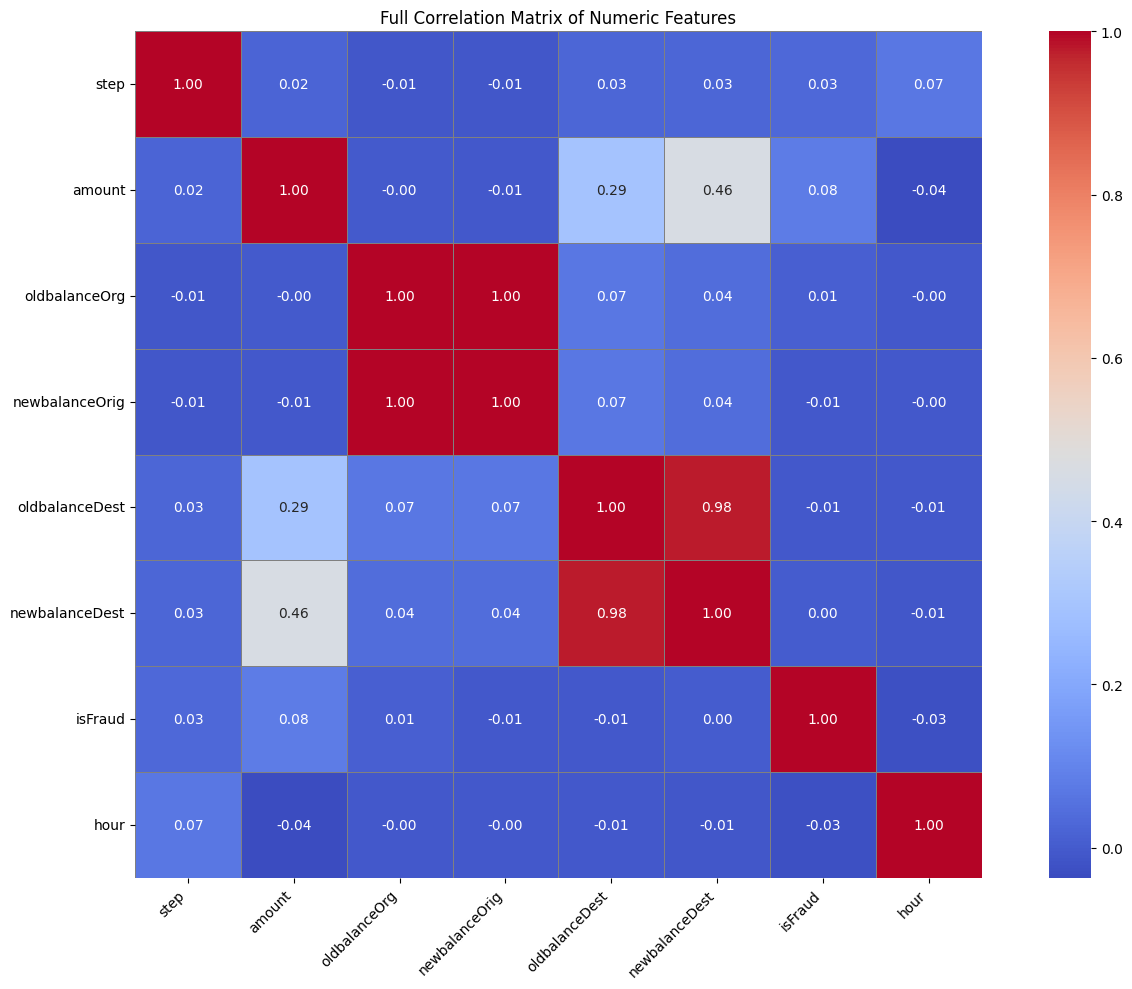

In [32]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
target_col = 'isFraud'
# Ensure the target column is included
if target_col not in numeric_df.columns:
    numeric_df[target_col] = df[target_col]

# Step 2: Compute full correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot full correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Full Correlation Matrix of Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
X=df_encoded.drop('isFraud',axis=1)
y=df_encoded['isFraud']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4453834, 11) (1908786, 11) (4453834,) (1908786,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [19]:
lor=LogisticRegression(max_iter=100)
lor.fit(X_train,y_train)
y_pred=lor.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.80      0.47      0.59      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.73      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906059     292]
 [   1294    1141]]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
rfc=RandomForestClassifier(n_estimators=50,
    max_depth=10,
    max_features='sqrt')
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448063
           1       0.99      0.75      0.85      5771

    accuracy                           1.00   4453834
   macro avg       1.00      0.87      0.93   4453834
weighted avg       1.00      1.00      1.00   4453834

[[4448040      23]
 [   1450    4321]]


In [27]:
xgb_clf=XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448063
           1       0.97      0.82      0.89      5771

    accuracy                           1.00   4453834
   macro avg       0.98      0.91      0.94   4453834
weighted avg       1.00      1.00      1.00   4453834

[[4447909     154]
 [   1025    4746]]


In [28]:
from sklearn.metrics import roc_auc_score, average_precision_score

y_rfc_pred=rfc.predict(X_test)
y_rfc_prob= rfc.predict_proba(X_test)[:, 1]

y_xgb_pred=xgb_clf.predict(X_test)
y_xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_rfc_pred))
print("ROC AUC:", roc_auc_score(y_test, y_rfc_prob))
print("PR AUC:", average_precision_score(y_test, y_rfc_prob))
print("\n")

print(classification_report(y_test, y_xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, y_xgb_prob))
print("PR AUC:", average_precision_score(y_test, y_xgb_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448063
           1       0.99      0.75      0.85      5771

    accuracy                           1.00   4453834
   macro avg       1.00      0.87      0.93   4453834
weighted avg       1.00      1.00      1.00   4453834

ROC AUC: 0.996118028739889
PR AUC: 0.872722024619413


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448063
           1       0.97      0.82      0.89      5771

    accuracy                           1.00   4453834
   macro avg       0.98      0.91      0.94   4453834
weighted avg       1.00      1.00      1.00   4453834

ROC AUC: 0.9983523507063661
PR AUC: 0.9406970137191046


This shows that XGBoost classifer model is best of these